In [1]:
# function to prepare to plot model output of land application
# first need combine with rangeland shapefile

# import modules
import pandas as pd
import numpy as np
import shapely as shp
import geopandas as gpd
from os.path import join as opj
import matplotlib.pyplot as plt
import os
import pickle


# suppress warnings in jupyter notebook!
import warnings
warnings.simplefilter('ignore')

def Fetch(df, key_col, key, value):
    #counties['disposal'].loc[counties['COUNTY']=='San Diego'].values[0]
    return df[value].loc[df[key_col]==key].values[0]

# set data path
DATA_DIR = "/Users/anayahall/projects/compopt/data"

# read in data
# rangeland polygons
rangelands = gpd.read_file(opj(DATA_DIR, "raw/CA_FMMP_G/gl_bycounty/grazingland_county.shp"))
# county polygons
county_shape = gpd.read_file(opj(DATA_DIR, "raw/CA_Counties/CA_Counties_TIGER2016.shp")) # OLD- raw shape
counties_popcen = pd.read_csv("../data/counties/CenPop2010_Mean_CO06.txt") # NEW - population weighted means!
counties_popcen.rename(columns = {'LATITUDE': 'lat', 'LONGITUDE': 'lon', 'COUNAME': 'NAME'}, inplace=True)

county_shape = county_shape.to_crs(epsg=4326)
county_shape['county_centroid'] = county_shape['geometry'].centroid


# solid waste inventory data (CLEANED)
swis =  gpd.read_file(opj(DATA_DIR, "clean/clean_swis.shp"))


# Minimize geodataframe to dataframe with just fields of interest
swis_df = swis[['SwisNo', 'Name', 'Latitude', 'Longitude', 'cap_m3', 'AcceptedWa']]

# rename lat and lon for easier plotting
swis_df.rename(columns = {'Latitude': 'lat', 'Longitude': 'lon'}, inplace=True)

# may just want foodwaste for adding to the plot
foodwaste_facilities = swis_df[swis_df['AcceptedWa'].str.contains("Food", na=False)]


##### FLAG - generate random data--- need to load real matrix of quantities here!!!
testmatrix = np.random.randint(100, size=(58, 109))
c2fmatrix = testmatrix


## LOAD REAL DATA HERE!!!! 
# with open('../c2f_test.p', 'rb') as f:
#     c2f_test = pickle.load(f) 
# c2f_test


fig, ax = plt.subplots(figsize = (10,10))
county_shape.plot(ax = ax, color = "white", linewidth=0.3, edgecolor = "grey")
ax.plot(swis_df['lon'], swis_df['lat'], 'x')
for i in range(len(county_shape)):
    lon, lat = county_shape['county_centroid'][i].xy
    ax.plot(lon, lat, c= 'lightgrey', marker='+')
for c_i,c in enumerate(counties_popcen):     
    c_lon = counties_popcen['lon'].iloc[counties_popcen.index == c_i].values[0]
    c_lat = counties_popcen['lat'].iloc[counties_popcen.index == c_i].values[0]
    for f_j,f in enumerate(swis):
        f_lon = swis_df['lon'].iloc[swis_df.index == f_j].values[0]
        f_lat = swis_df['lat'].iloc[swis_df.index == f_j].values[0]
        ## need to check connectivity matrix here
        q = c2fmatrix[c_i, f_j]
        if 0<q<25:
            ax.plot([c_lon, f_lon], [c_lat, f_lat], 'k-', alpha = 0.5, linewidth=(0.2))
        elif q<50:    
            ax.plot([c_lon, f_lon], [c_lat, f_lat], 'k-', alpha = 0.5, linewidth=(0.5))
        elif q<100:
            ax.plot([c_lon, f_lon], [c_lat, f_lat], 'k-', alpha = 0.5, linewidth=(1))
plt.show()


In [3]:

# def plotrangelandapp(dictionary, name):
# rappdf = pd.DataFrame.from_dict(dictionary)
# # sum application on rangeland by all facilities
# rappdf['sum'] = rappdf.sum(axis = 1, skipna = True)*1000

# rangelands = gpd.read_file(opj(DATA_DIR, "raw/CA_FMMP_G/grazingland_dis/CA_grazingland.shp")) #dissolved version
# rangelands = rangelands.to_crs(epsg=4326)

# # make column of object ID for merging
# rappdf['OBJECTID'] = rappdf.index
# # only keep id and summed 
# rappdf_min = rappdf[['sum', 'OBJECTID']]
# counties_popcen

,STATEFP,COUNTYFP,NAME,STNAME,POPULATION,lat,lon
0,6,1,Alameda,California,1510271,37.705201,-122.100393
1,6,3,Alpine,California,1175,38.728298,-119.847603
2,6,5,Amador,California,38091,38.394208,-120.775729
3,6,7,Butte,California,220000,39.669037,-121.707635
4,6,9,Calaveras,California,45578,38.163627,-120.633718
5,6,11,Colusa,California,21419,39.156148,-122.085557
6,6,13,Contra Costa,California,1049025,37.935588,-122.030131
7,6,15,Del Norte,California,28610,41.791232,-124.163088
8,6,17,El Dorado,California,181058,38.746543,-120.744330
9,6,19,Fresno,California,930450,36.738918,-119.767884


In [5]:
# plotting!!!!!!!!!!!!!!!!!!!!!!!!!!
# plt.plot(swis_df['lon'], swis_df['lat'], 'x')
# for i in range(len(counties)):
#     lon, lat = counties['county_centroid'][i].xy
#     plt.plot(lon, lat, 'ro')
# plt.show()

# counties['lon'] = counties['county_centroid'].apply(lambda p: p.x)
# counties['lat'] = counties['county_centroid'].apply(lambda p: p.y)


# plt.plot([swis_df['lon'], counties['lon']], [swis_df['lat'], counties['lat']], '--')
# plt.show()



# maybe need to make connectivity matrix --- convert dict to dataframe
# 
# as matrix, 
# then loop through ids and FETCH values of lat, lon and value!



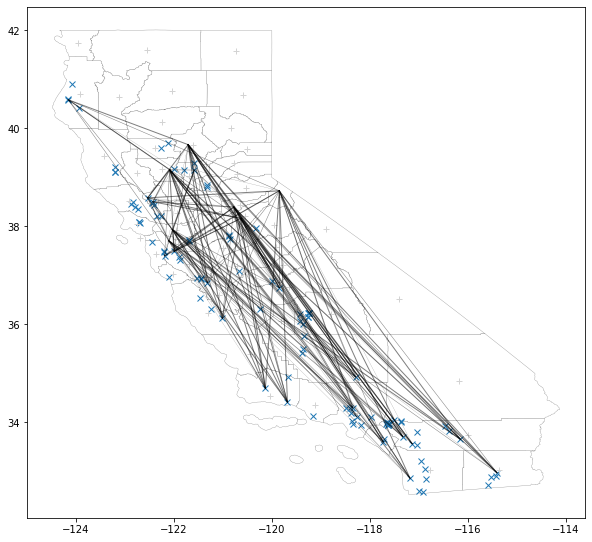

In [ ]:
# swis_df['lat'].loc[swis_df['SwisNo']=='01-AA-0310'].values




# # merge with rangelands
# merge = pd.merge(rangelands, rappdf_min, on = "OBJECTID")
# # plot
# f, ax = plt.subplots()
# CA.plot(ax = ax, color = "white", figsize = (10,10), linewidth=0.3, edgecolor = "grey")
# # CA.set_geometry('centroid').plot(ax= ax, color = 'black')
# swis.plot(ax = ax, marker = '*', color = 'black', alpha=.7, markersize = 10, linewidth=0)
# merge.plot(ax= ax, column = merge['sum']**3, cmap = 'Greens', linewidth=0.03, alpha = 0.7,
# 	edgecolor = "green", legend = False)
# ax.axis('off')
# ax.set_title('Rangeland Application', fontdict={'fontsize': '12', 'fontweight' : '3'})
# plt.savefig(opj(OUT_DIR, str(name) + "_rangelandapps.png"), dpi=300)
# # plt.savefig(opj(OUT_DIR, "fg100_rangelandapps.png"), dpi=300)

In [ ]:
# try out on small subset
counties_sub = counties[(counties['NAME'] == "Los Angeles") | (counties['NAME'] == "San Diego") |
    (counties['NAME'] == "Orange")| (counties['NAME'] == "Imperial")]
counties_sub

# swis
# # # SUBSET out four counties
swis_sub = swis[(swis['County'] == "San Diego") | (swis['County'] == "Orange") | 
    (swis['County'] == "Imperial")]
swis_sub

In [ ]:
c2fmatrix = c2f_test

swis_sub.rename(columns = {'Latitude': 'lat', 'Longitude': 'lon'}, inplace=True)





fig, ax = plt.subplots(figsize = (10,10))
counties.plot(ax = ax, color = "white", linewidth=0.3, edgecolor = "grey")
ax.plot(swis_df['lon'], swis_df['lat'], 'x')
for i in range(len(counties)):
    lon, lat = counties['county_centroid'][i].xy
    ax.plot(lon, lat, c= 'lightgrey', marker='+')
for i in counties_sub.index:
#     print('**************')
#     print(c_i)
    county_name = counties_sub['NAME'].iloc[counties_sub.index == i].values[0]
    c_lon = counties_sub['lon'].iloc[counties_sub.index == i].values[0]
    c_lat = counties_sub['lat'].iloc[counties_sub.index == i].values[0]
    for j in swis_sub.index:
        f_no = swis_sub['SwisNo'].iloc[swis_sub.index == j].values[0]
        f_lon = swis_sub['lon'].loc[swis_sub.index == j].values[0]
        f_lat = swis_sub['lat'].loc[swis_sub.index == j].values[0]
        q = c2fmatrix.loc[c2fmatrix.index == f_no, county_name].values[0]
        if q!=0:
            ax.plot([c_lon, f_lon], [c_lat, f_lat], 'k-', alpha = 0.5, linewidth=0.5)
            # no plot
        if 0 < q <10000:
            ax.plot([c_lon, f_lon], [c_lat, f_lat], 'k-', alpha = 0.5, linewidth=0.5)
        elif q>100000:
            ax.plot([c_lon, f_lon], [c_lat, f_lat], 'k-', alpha = 0.5, linewidth=1.5)
plt.show()

In [ ]:
# c2fmatrix.loc[c2fmatrix.index == '30-AB-0378', 'Los Angeles'].values[0]
c2fmatrix

In [ ]:
np.log(111546)

In [ ]:
# load csv?
# or load text file
# need to be able to load and replace for counties in existing model,
# then make sure to save dists and quants, run overnight on baseline



In [ ]:
counties = pd.read_csv("../data/counties/CenPop2010_Mean_CO06.txt") # NEW - population weighted means!
# rename lat and lon for easier plotting
counties.rename(columns = {'LATITUDE': 'lat', 'LONGITUDE': 'lon', 'COUNAME': 'NAME'}, inplace=True)



In [ ]:
counties